In [1]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def load_otree(filename):
    df = pd.read_csv(filename)[[
        'IPAddress', 'participant_id', 'group_id', 'session_code', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4'
    ]]
    df['round'] = 0
    return df

df_otree = pd.read_csv('results/2018-12-21/all_apps_wide_2018-12-21.csv')
df_otree.loc[0]

participant.id_in_session                                                            1
participant.code                                                              4837qmc2
participant.label                                                                  NaN
participant._is_bot                                                                  0
participant._index_in_pages                                                         11
participant._max_page_index                                                         11
participant._current_app_name                                   net_delib_20181221_end
participant._current_page_name                                                 EndPage
participant.ip_address                                                 141.211.133.200
participant.time_started                              2018-12-21 14:45:24.899853+00:00
participant.visited                                                                  1
participant.mturk_worker_id                

In [3]:
df_chat = pd.read_csv("results/2018-12-21/Chat messages (accessed 2018-12-21).csv")

In [4]:
df_chat = df_chat[df_chat['participant__session__code'] == 'k7t2tuxk']
channels = set(df_chat['channel'])

In [5]:
channel_texts = {}
for c in channels:
    messages = df_chat[df_chat["channel"] == c].sort_values('timestamp')
    messages['line'] = (
        messages['participant__id_in_session'].astype(str)
        + '-' + messages['participant__code']
        + '-' + messages['nickname']
        + ': ' + messages['body'] + "\n")
    channel_texts[c] = "\n".join(messages['line'])

In [6]:
for k, v in channel_texts.items():
    with open("computed/{}.txt".format(k), 'w') as f:
        f.write("======== {} ========\n\n".format(k))
        f.write(v)
    

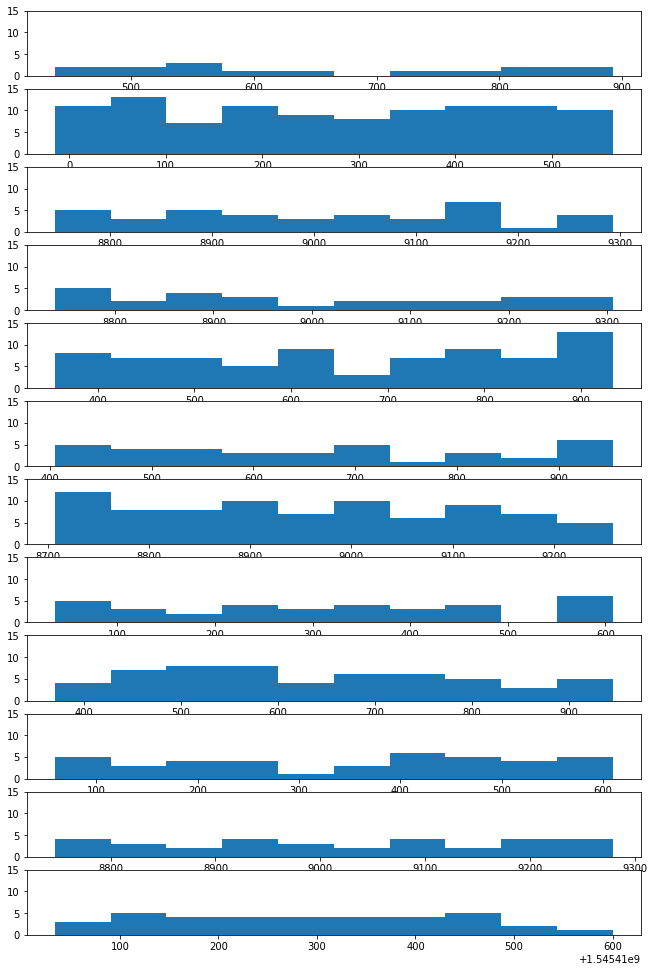

In [7]:
plt.figure(figsize=(11,17))
for i, c in enumerate(channels):
    messages = df_chat[df_chat['channel'] == c]
    plt.subplot(len(channels), 1, i+1)
    h = plt.hist(messages['timestamp'], 10)
    plt.ylim([0, 15])

In [10]:
df_otree.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._current_page_name', 'participant.ip_address',
       'participant.time_started', 'participant.visited',
       'participant.mturk_worker_id', 'participant.mturk_assignment_id',
       'participant.payoff', 'participant.payoff_plus_participation_fee',
       'session.code', 'session.label', 'session.experimenter_name',
       'session.mturk_HITId', 'session.mturk_HITGroupId', 'session.comment',
       'session.is_demo', 'session.config.real_world_currency_per_point',
       'session.config.participation_fee',
       'net_delib_20181221_start.1.player.id_in_group',
       'net_delib_20181221_start.1.player.payoff',
       'net_delib_20181221_start.1.group.id_in_subsession',
       'net_delib_20181221_start.1.subsession.round_number',
       'net_delib_20181221A.

In [20]:
import networkx as nx
G = nx.Graph()
participants = set()
groups = set()
for i in df_chat.index:
    participants.add(df_chat.loc[i, 'participant__id_in_session'])
    groups.add(df_chat.loc[i, 'channel'])
    G.add_edge(
        df_chat.loc[i, 'participant__id_in_session'],
        df_chat.loc[i, 'channel']
    )


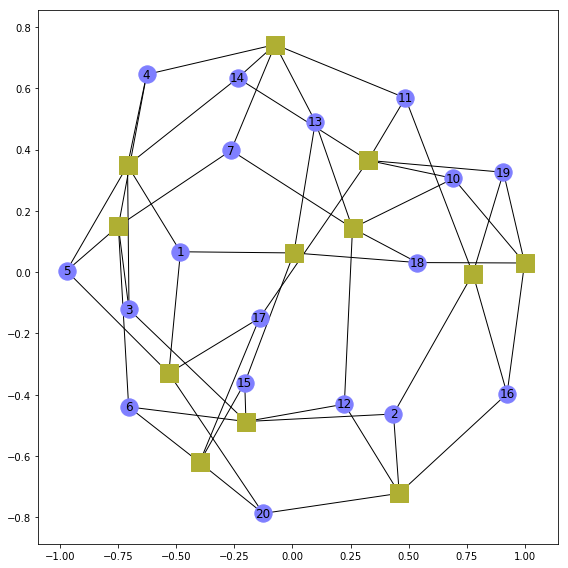

In [30]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=participants, node_color='#7F7FFF')
nx.draw_networkx_nodes(G, pos, nodelist=groups, node_color='#AFAF33', node_shape='s')
nx.draw_networkx_labels(G, pos, labels=dict((v, v) for v in participants))
plt.tight_layout()

In [31]:
GG = nx.bipartite.projected_graph(G, participants)

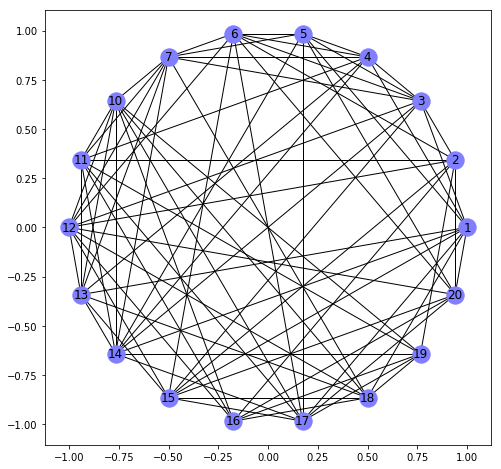

In [33]:
plt.figure(figsize=(8, 8))
nx.draw_networkx(GG, nx.circular_layout(GG), node_color='#7F7FFF')